# Problem

The regularized least-squares problem has the form

<br>
$$ \min_{\theta} \;\lVert A\theta -y\rVert_2^2 + \lambda \lVert \theta \rVert_2^2$$

(a) Show that the solution is given by
<br><br>
$$ \hat{\theta} = \left( A^T A + \lambda I_n \right)^{-1} A^T y $$
* Do not use the method of Lagrangian multipliers
<br><br>

(b) Write down a gradient descent algorithm for a given optimization problem. Assume the optimization problem in 1D case:

$$ \min_{\theta}  (a\theta -y)^2 + \lambda\theta^2 $$

(c) Based on the result of (b), describe the role of regularizer term.

* Hint: Gradient $g$ is computed by $ g = g_{projection} + g_{regularizer} $.

(d) Describe results of (a) and (b) have the same meaning.

(e) Find and draw an approximated curve of the given data points in Python using your gradient descent algorithm.

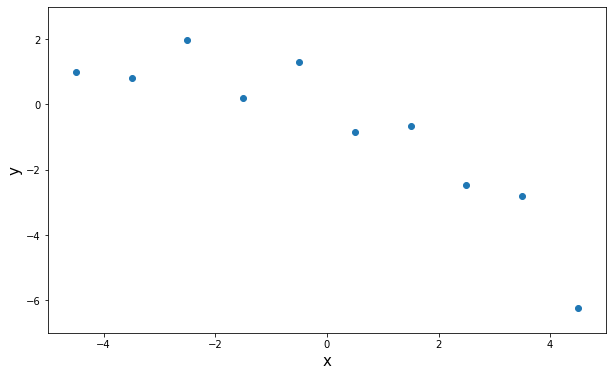

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4.5, 4.5, 10)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512])

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o')
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xlim(-5, 5)
plt.ylim(-7, 3)
plt.show()

# 대충순서

## 1. W값 아무걸로 initializing 하기
## 2. W2x^2 + W1x + W0 라인그려보기
## 3. Cost Function 구하기
## 4. Gradient W 구하기
## 5. iterative 하게 G.D하기
## 5-1. iterative 하게 G.D할때 loss값 줄어드는지 확인

In [2]:
x = np.linspace(-4.5, 4.5, 10).reshape(-1, 1)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]).reshape(-1, 1)
X = np.hstack([x**2,x, x**0])
X = np.asmatrix(X)

# Normal Equation: (X^T*X)^-1 * X^T * y
theta = (X.T*X).I*X.T*y
print(theta)
#theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.transpose(X)),y)
#print(theta)

[[-0.13504129]
 [-0.71070424]
 [ 0.33669062]]


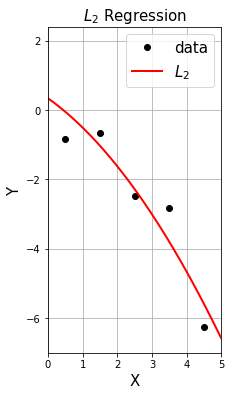

In [3]:
# to plot
plt.figure(figsize=(10, 6))
plt.title('$L_2$ Regression', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.plot(x, y, 'ko', label="data")

# to plot a  line
xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp = theta[0,0]*xp**2 + theta[1,0]*xp + theta[2,0]

plt.plot(xp, yp, 'r', linewidth=2, label="$L_2$")
plt.legend(fontsize=15)
plt.axis('scaled')
plt.grid(alpha=1)
plt.xlim([0, 5])
plt.show()